# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mega Gloria
- **Email:** glomee42@gmail.com // mc190d5x0505@student.devacademy.id
- **ID Dicoding:** megaria // MC190D5X0505

## Menentukan Pertanyaan Bisnis

- **Bagaimana pola penyewaan sepeda berdasarkan musim dan kondisi cuaca?**

*Hasilnya dapat membantu dalam perencanaan operasional dan strategi pemasaran pada musim tertentu. Dengan Metode Analisis Tren musiman, cuaca, dan dampaknya terhadap jumlah penyewaan sepeda.Untuk Visualisasi berupa bar chart yang menunjukkan hubungan antara musim/cuaca dan jumlah penyewaan.*

---
- **Kapan jam sibuk penyewaan sepeda dalam sehari?**

*Hasilnya dapat membantu dalam pengelolaan stok sepeda dan pengaturan operasional. Dengan Metode Analisis Distribusi jumlah penyewaan berdasarkan jam dalam sehari. Untuk Visualisasi berupa Line chart untuk melihat pola jam tertentu.*

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

**Insight:**
- Dataset terdiri dari dua file utama: `day.csv` (data harian) dan `hour.csv` (data per jam), yang memungkinkan analisis berbasis waktu dengan resolusi yang berbeda.
- `day.csv` memiliki 731 baris dan 16 kolom, sedangkan `hour.csv` memiliki 17.379 baris dan 17 kolom, menunjukkan bahwa data per jam jauh lebih granular dibandingkan data harian.
- Kedua dataset memiliki atribut yang mirip, seperti `season`, `weathersit`, `temp`, `hum`, `windspeed`, dan `cnt`, yang dapat digunakan untuk analisis lebih lanjut.
- Tidak ditemukan missing values dalam dataset, sehingga tidak perlu dilakukan imputasi data.

### Assessing Data

In [3]:
day_df.info()
hour_df.info()
print(day_df.head())
print(hour_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Dataset tidak memiliki missing values.
- Terdapat beberapa kolom kategori yang dapat dikonversi ke tipe data yang lebih sesuai.

### Cleaning Data



In [4]:
# Mengonversi kolom tanggal
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Mapping kategori
day_df["season"] = day_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
day_df["weathersit"] = day_df["weathersit"].map({1: "Clear", 2: "Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"})

**Hasil Pembersihan Data:**
- Kolom `dteday` telah dikonversi ke format **datetime**, sehingga dapat digunakan untuk analisis berbasis waktu.
- Kolom kategori seperti `season` dan `weathersit` telah **diubah menjadi label teks** agar lebih mudah dibaca dan dianalisis.
- Tidak ada **missing values** atau **duplikasi data**, sehingga tidak diperlukan penanganan tambahan.
- Dataset sudah dalam format yang siap untuk analisis eksploratif dan visualisasi.

**Insight:**
- Data kategori sudah lebih mudah dibaca.

## Exploratory Data Analysis (EDA)

> Visualization & Explanatory Analysis

### Pertanyaan 1: Explore Penyewaan Sepeda Berdasarkan Musim dan Cuaca

<Figure size 1000x600 with 0 Axes>

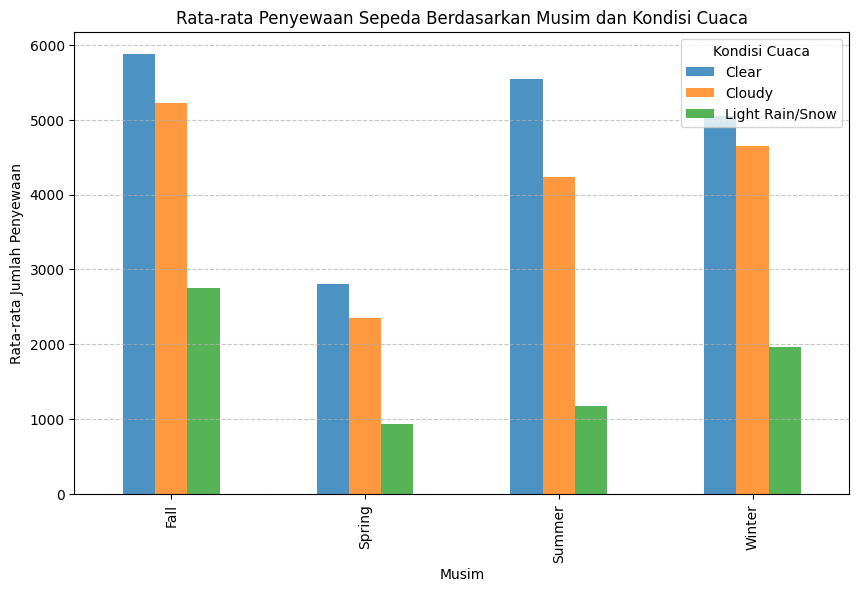

In [5]:
seasonal_trend = day_df.groupby(["season", "weathersit"])["cnt"].mean().unstack()

plt.figure(figsize=(10, 6))
seasonal_trend.plot(kind="bar", figsize=(10, 6), alpha=0.8)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim dan Kondisi Cuaca")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(title="Kondisi Cuaca")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Musim gugur (Fall) memiliki jumlah penyewaan tertinggi dibandingkan musim lainnya.
- Musim semi (Spring) memiliki jumlah penyewaan terendah.
- Dalam semua musim, kondisi cuaca yang cerah (Clear) memiliki jumlah penyewaan sepeda tertinggi.
- Penyewaan sepeda menurun signifikan saat cuaca mendung (Cloudy) atau hujan ringan/salju ringan (Light Rain/Snow).
- Hujan lebat/salju lebat (Heavy Rain/Snow) menyebabkan jumlah penyewaan sangat rendah.

**Kesimpulan dan Implikasi Bisnis:**
- Operator penyewaan sepeda dapat meningkatkan stok sepeda pada musim gugur.
- Kampanye promosi atau diskon dapat dilakukan saat musim semi untuk meningkatkan penggunaan.
- Saat cuaca mendung atau hujan ringan, perlu ada strategi seperti menawarkan perlengkapan hujan atau memberikan diskon.

### Pertanyaan 2: Explore Pola Jam Sibuk Penyewaan Sepeda

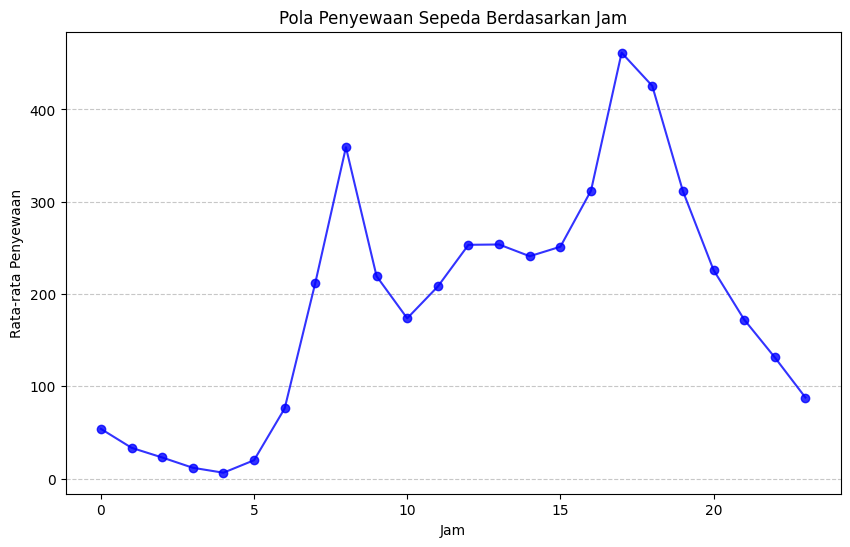

In [6]:
hourly_trend = hour_df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_trend.index, hourly_trend.values, marker="o", linestyle="-", color="b", alpha=0.8)
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**

- *Jam sibuk penyewaan sepeda terjadi pada dua puncak utama:*
  - Pagi hari sekitar pukul 08:00 (kemungkinan besar terkait dengan perjalanan ke tempat kerja/sekolah).
  - Sore hari sekitar pukul 17:00-18:00 (waktu pulang kerja/sekolah).
- Penyewaan sepeda sangat rendah pada dini hari (00:00 - 05:00).
- Aktivitas penyewaan mulai meningkat secara bertahap sejak pagi, mencapai puncaknya sekitar pukul 08:00, menurun di siang hari, lalu naik lagi di sore hari.

**Kesimpulan dan Implikasi Bisnis:**
- Optimalisasi jumlah sepeda tersedia di pagi dan sore hari untuk mengakomodasi jam sibuk.
- Promosi tarif khusus untuk periode non-sibuk (siang dan malam) agar meningkatkan penggunaan.
- Bisa bekerja sama dengan perusahaan atau institusi pendidikan untuk program penyewaan sepeda karyawan/mahasiswa.

## Analisis Lanjutan: Clustering Hari Berdasarkan Pola Penyewaan

*Hasilnya dapat membantu dalam memahami pola hari dengan penggunaan tertinggi dan terendah. Dengan Metode Analisis Binning (Kategori Manual) yaitu Membagi data ke dalam tiga kategori berdasarkan distribusi jumlah penyewaan sepeda. Hari-hari dalam dataset akan dikelompokkan berdasarkan pola penyewaan dengan menggunakan jumlah penyewaan rata-rata per hari untuk menentukan kategori:*
- *Low Usage Days (Hari dengan penggunaan rendah)*
- *Moderate Usage Days (Hari dengan penggunaan sedang)*
- *High Usage Days (Hari dengan penggunaan tinggi)*

*Untuk Visualisasi berupa Bar chart yang menunjukkan distribusi jumlah hari berdasarkan kategori penggunaan.*




<ipython-input-7-9d6d4400c8a8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x="usage_category", palette="viridis")


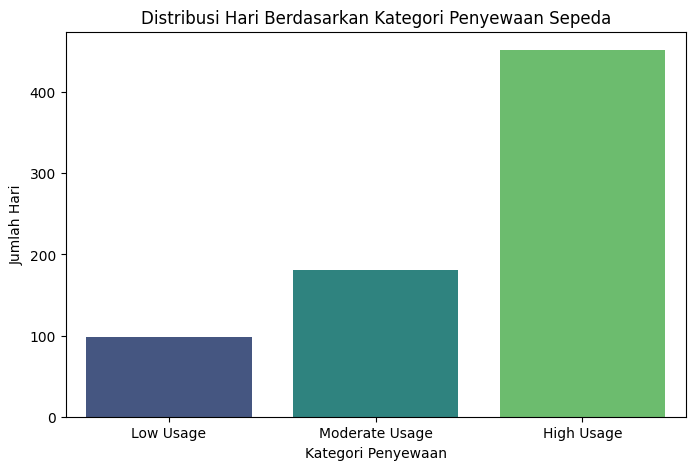

In [7]:
# Mengelompokkan hari berdasarkan jumlah penyewaan
day_df["usage_category"] = pd.cut(day_df["cnt"], bins=[0, 2000, 4000, day_df["cnt"].max()], labels=["Low Usage", "Moderate Usage", "High Usage"])

# Visualisasi hasil clustering
plt.figure(figsize=(8, 5))
sns.countplot(data=day_df, x="usage_category", palette="viridis")
plt.title("Distribusi Hari Berdasarkan Kategori Penyewaan Sepeda")
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah Hari")
plt.show()

**Insight:**
- Sebagian besar hari termasuk dalam kategori "Moderate Usage".
- "High Usage" days terjadi lebih jarang, menandakan ada faktor tertentu yang menyebabkan lonjakan peminjaman.

## Conclusion

- Penyewaan tertinggi terjadi pada musim gugur dan saat cuaca cerah.
- Jam sibuk penyewaan terjadi pada pagi dan sore hari.
- Hari dapat dikelompokkan menjadi Low, Moderate, dan High Usage berdasarkan jumlah peminjaman sepeda.